In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import pickle 

from dtw_functions import *

In [4]:
#Read from datafile
datafile = '../Data/flevoland.txt'

df_orig = pd.read_csv(datafile,skiprows=1,usecols=[1,2,3,4,5,6,7,8],names=['x','y','z','peat','clay_original','clayey_sand','sand','peat_on_PL'])

In [5]:
#Fill absent data with zeroes
df_orig.fillna(0, inplace=True)

In [6]:
data = Data(dataframe=df_orig)

In [7]:
df_orig['clay'] = df_orig['clay_original'] + df_orig['clayey_sand']

In [8]:
data.data_summary()

  variable  num_values       min       max  step_size       mean      std
0        x         194  137050.0  156350.0      100.0  146700.00  5600.22
1        y         175  478950.0  496350.0      100.0  487650.00  5051.73
2        z          38     -16.5       2.0        0.5      -7.25     5.48


In [9]:
#Unique number of points in x, y, z
N_x_unique = df_orig['x'].nunique()
N_y_unique = df_orig['y'].nunique()
N_z_unique = df_orig['z'].nunique()

#Sort x, y, z values
x_sorted = sorted(df_orig['x'].unique())
y_sorted = sorted(df_orig['y'].unique())
z_sorted = sorted(df_orig['z'].unique())

#Minimum x, y, z values
x_min = np.min(df_orig['x'])
y_min = np.min(df_orig['y'])
z_min = np.min(df_orig['z'])

#Maximum x, y, z values
x_max = np.max(df_orig['x'])
y_max = np.max(df_orig['y'])
z_max = np.max(df_orig['z'])

#Step sizes in x, y, z
x_step = x_sorted[1] - x_sorted[0]
y_step = y_sorted[1] - y_sorted[0]
z_step = z_sorted[1] - z_sorted[0]

#Number of points in x, y, z. Have checked that all points in x, y, z are equidistant, i.e., no missing points.
N_x = N_x_unique
N_y = N_y_unique
N_z = N_z_unique

In [10]:
#Create array of x, y, z indices 
indices_xyz = np.array([(df_orig['x']-x_min)/x_step, (df_orig['y']-y_min)/y_step, (df_orig['z']-z_min)/z_step])

indices_xyz = indices_xyz.astype(int)

#Indices in dataframe df below
indices_df = np.ravel_multi_index(indices_xyz, (N_x, N_y, N_z))

In [11]:
#Determine x, y, z indices
xi = [((x-x_min)/x_step).astype(int) for x in x_sorted]
yi = [((y-y_min)/y_step).astype(int) for y in y_sorted]
zi = [((z-z_min)/z_step).astype(int) for z in z_sorted]

In [12]:
#Create meshgrid of x, y, z indices
xv, yv, zv = np.meshgrid(xi, yi, zi, indexing='ij')

In [13]:
#Create dataframe with a row for each x, y, z combination, and empty columns for the probabilities
df = pd.DataFrame(np.array([xv.flatten(), yv.flatten(), zv.flatten(), np.full(N_x*N_y*N_z, -1), np.full(N_x*N_y*N_z, -1), 
                            np.full(N_x*N_y*N_z, -1)]).T, 
                            columns = ['x','y','z','peat','clay','sand'])

In [14]:
df['peat'][indices_df] = df_orig['peat']
df['clay'][indices_df] = df_orig['clay']
df['sand'][indices_df] = df_orig['sand']

<ipython-input-14-b863b495a5c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clay'][indices_df] = df_orig['clay']
<ipython-input-14-b863b495a5c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sand'][indices_df] = df_orig['sand']


In [15]:
#dataframe = df[['peat','clay','sand']]

In [16]:
data = Data(dataframe=df)

In [17]:
data.data_summary()

  variable  num_values  min  max  step_size  mean    std
0        x         194    0  193          1  96.5  56.00
1        y         175    0  174          1  87.0  50.52
2        z          38    0   37          1  18.5  10.97


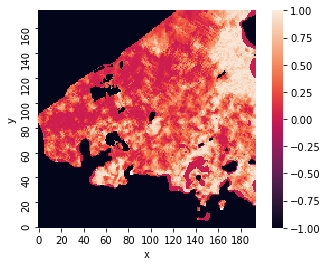

In [18]:
data.display_cross_section(variable='z', value=18, quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=20)

Text(0.5, 1.0, 'sand')

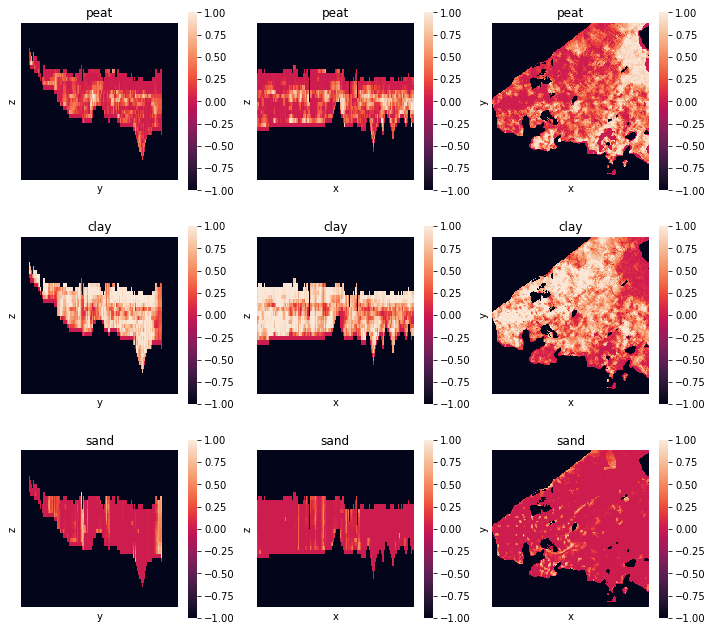

In [43]:
plt.subplots(figsize=(10,9))
plt.tight_layout()

plt.subplot(331)
data.display_cross_section(variable='x', value=97, quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('peat')
plt.subplot(332)
data.display_cross_section(variable='y', value=87, quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('peat')
plt.subplot(333)
data.display_cross_section(variable='z', value=18, quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('peat')

plt.subplot(334)
data.display_cross_section(variable='x', value=97, quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('clay')
plt.subplot(335)
data.display_cross_section(variable='y', value=87, quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('clay')
plt.subplot(336)
data.display_cross_section(variable='z', value=18, quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('clay')

plt.subplot(337)
data.display_cross_section(variable='x', value=97, quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('sand')
plt.subplot(338)
data.display_cross_section(variable='y', value=87, quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('sand')
plt.subplot(339)
data.display_cross_section(variable='z', value=18, quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=0, yticklabels=0)
plt.title('sand')

In [20]:
data.display_cross_section(variable='z', quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=20)

interactive(children=(IntSlider(value=18, description='value', max=37), Output()), _dom_classes=('widget-inter…

In [21]:
data.display_cross_section(variable='x', quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=4)

interactive(children=(IntSlider(value=96, description='value', max=193), Output()), _dom_classes=('widget-inte…

In [22]:
data.display_cross_section(variable='y', quantity='peat', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=20)

interactive(children=(IntSlider(value=87, description='value', max=174), Output()), _dom_classes=('widget-inte…

In [23]:
#data.display_cross_section(variable='z', quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=20)

In [24]:
data.display_cross_section(variable='x', quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=4)

interactive(children=(IntSlider(value=96, description='value', max=193), Output()), _dom_classes=('widget-inte…

In [25]:
data.display_cross_section(variable='y', quantity='clay', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=4)

interactive(children=(IntSlider(value=87, description='value', max=174), Output()), _dom_classes=('widget-inte…

In [26]:
data.display_cross_section(variable='z', quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=20)

interactive(children=(IntSlider(value=18, description='value', max=37), Output()), _dom_classes=('widget-inter…

In [27]:
data.display_cross_section(variable='x', quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=4)

interactive(children=(IntSlider(value=96, description='value', max=193), Output()), _dom_classes=('widget-inte…

In [28]:
data.display_cross_section(variable='y', quantity='sand', logscale=False, vmin=-1, vmax=1, xticklabels=20, yticklabels=4)

interactive(children=(IntSlider(value=87, description='value', max=174), Output()), _dom_classes=('widget-inte…

In [29]:
with open('layer_templates_cs_is_clay.p', 'rb') as infile:
    layer_templates = pickle.load(infile)

In [30]:
with open('cluster_map_cs_is_clay.p', 'rb') as infile:
    cluster_map = pickle.load(infile)

In [31]:
x = 60
y = 20

df_select_data = df[(df['x']==x) & (df['y']==y) & (df['peat']!=-1) & (df['peat']!=0) & (df['clay']!=0) & (df['sand']!=0)]
df_data_slice = df_select_data[['peat','clay','sand']]
data_slice = df_data_slice.to_numpy()

variable_labels = ['peat','clay','sand']
z_labels = df_select_data['z'].to_numpy()

xlabel_rotation = 45
cmap = 'Greens'

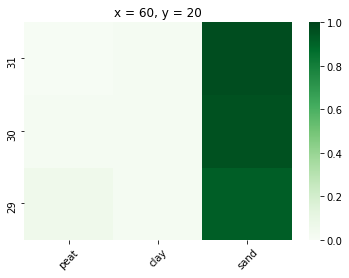

In [32]:
plt.figure()
ax = sns.heatmap(data_slice, vmin=0, vmax=1, xticklabels=variable_labels, yticklabels=z_labels, cmap=cmap)
ax.set_title('x = %d, y = %d'%(x,y))
ax.set_xticklabels(labels=variable_labels, rotation=xlabel_rotation)
ax.set_yticklabels(labels=z_labels)
ax.invert_yaxis()
plt.show()

In [33]:
layer_templates[cluster_map[y,x]]

'sand'

In [34]:
x = 155
y = 35

df_select_data = df[(df['x']==x) & (df['y']==y) & (df['peat']!=-1) & ((df['peat']!=0) & (df['clay']!=0) & (df['sand']!=0))]
df_data_slice = df_select_data[['peat','clay','sand']]
data_slice = df_data_slice.to_numpy()

variable_labels = ['peat','clay','sand']
z_labels = df_select_data['z'].to_numpy()

xlabel_rotation = 45
cmap = 'Greens'

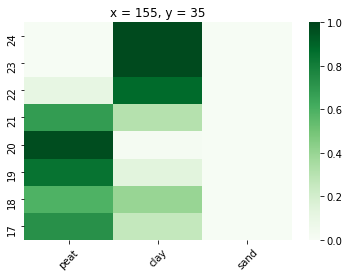

In [35]:
plt.figure()
ax = sns.heatmap(data_slice, vmin=0, vmax=1, xticklabels=variable_labels, yticklabels=z_labels, cmap=cmap)
ax.set_title('x = %d, y = %d'%(x,y))
ax.set_xticklabels(labels=variable_labels, rotation=xlabel_rotation)
ax.set_yticklabels(labels=z_labels)
ax.invert_yaxis()
plt.show()

In [36]:
layer_templates[cluster_map[y,x]]

'peat - clay'

In [37]:
x = 70
y = 80

df_select_data = df[(df['x']==x) & (df['y']==y) & (df['peat']!=-1) & ((df['peat']!=0) & (df['clay']!=0) & (df['sand']!=0))]
df_data_slice = df_select_data[['peat','clay','sand']]
data_slice = df_data_slice.to_numpy()

variable_labels = ['peat','clay','sand']
z_labels = df_select_data['z'].to_numpy()

xlabel_rotation = 45
cmap = 'Greens'

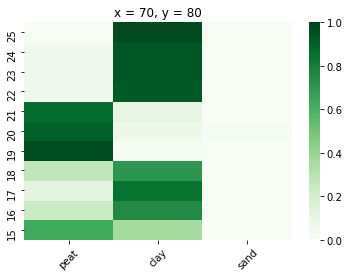

In [38]:
plt.figure()
ax = sns.heatmap(data_slice, vmin=0, vmax=1, xticklabels=variable_labels, yticklabels=z_labels, cmap=cmap)
ax.set_title('x = %d, y = %d'%(x,y))
ax.set_xticklabels(labels=variable_labels, rotation=xlabel_rotation)
ax.set_yticklabels(labels=z_labels)
ax.invert_yaxis()
plt.show()

In [39]:
layer_templates[cluster_map[y,x]]

'clay - peat - clay'

In [40]:
x = 145
y = 165

df_select_data = df[(df['x']==x) & (df['y']==y) & (df['peat']!=-1) & ((df['peat']!=0) & (df['clay']!=0) & (df['sand']!=0))]
df_data_slice = df_select_data[['peat','clay','sand']]
data_slice = df_data_slice.to_numpy()

variable_labels = ['peat','clay','sand']
z_labels = df_select_data['z'].to_numpy()

xlabel_rotation = 45
cmap = 'Greens'

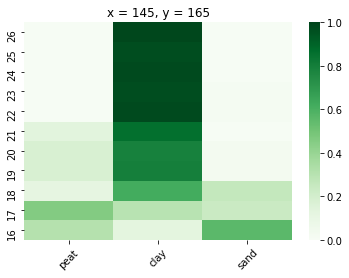

In [41]:
plt.figure()
ax = sns.heatmap(data_slice, vmin=0, vmax=1, xticklabels=variable_labels, yticklabels=z_labels, cmap=cmap)
ax.set_title('x = %d, y = %d'%(x,y))
ax.set_xticklabels(labels=variable_labels, rotation=xlabel_rotation)
ax.set_yticklabels(labels=z_labels)
ax.invert_yaxis()
plt.show()

In [42]:
layer_templates[cluster_map[y,x]]

'sand - peat - clay'

clayey sand = clay